# Adaline NN
> Thêm khối trích dẫn




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
y = df.iloc[0:100,4].values
y=np.where(y=='Iris-setosa', -1, 1)

X = df.iloc[0:100, [0,2]].values

In [31]:
class AdalineGD(object):
  def __init__(self,lr=0.01,epochs = 50):
    self.epochs = epochs
    self.lr = 0.01
  def train(self,X,y):
      self.w_ = np.zeros(1+X.shape[1])
      self.cost_ = []
      for _ in range(self.epochs):
        output = self.net_input(X)
        errors = (y - output)
        self.w_[1:] += self.lr * X.T.dot(errors)
        self.w_[0] += self.lr * errors.sum()
        cost = (errors**2).sum() / 2.0
        self.cost_.append(cost)
      return self
  def net_input(self,X):
      return np.dot(X, (self.w_[1:]+self.w_[0]))
  def activation(self,X):
      return self.net_input(X)
  def predict(self,X,y):
        return np.where(self.activation(X) >= 0.0, 1, -1)



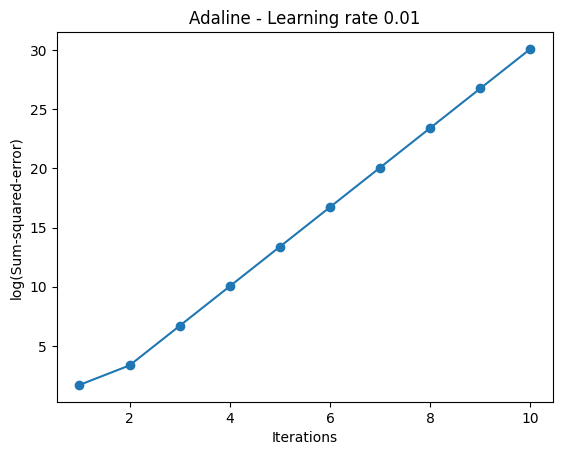

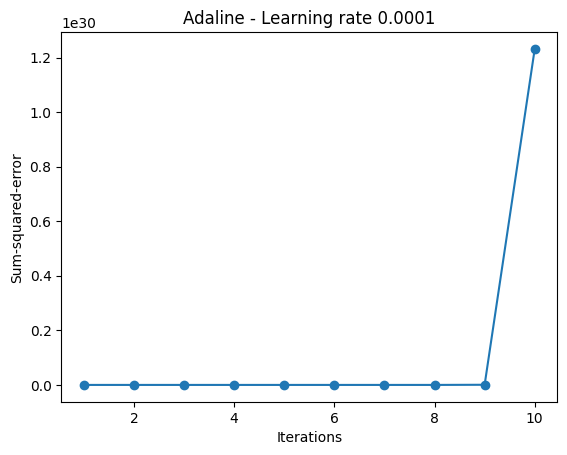

In [32]:
ada = AdalineGD(epochs=10, lr=0.01).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), np.log10(ada.cost_), marker='o')
plt.xlabel('Iterations')
plt.ylabel('log(Sum-squared-error)')
plt.title('Adaline - Learning rate 0.01')
plt.show()
ada = AdalineGD(epochs=10, lr=0.0001).train(X, y)
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker='o')
plt.xlabel('Iterations')
plt.ylabel('Sum-squared-error')
plt.title('Adaline - Learning rate 0.0001')
plt.show()